# Lesson 8

Feb 7, 2023

### Topics:
- Object Orient Programming (OOP)
    - heavy concept day
        - ask lots of questions
            - I'm happy to push content to next lesson to make time for your questions
            
### Admin:
- hw1 due Friday
- lab2: triple or nothing
    - how was it?  any questions?
- rise (making jupyter a slideshow) is broken for me (don't ask why ... arg)



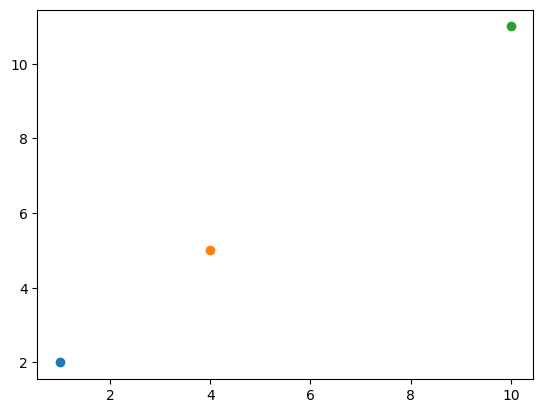

In [13]:
some_dict = {1:2, 4:5, 10:11}

for x, y in some_dict.items():
    plt.scatter(x, y)

In [17]:
import seaborn as sns

df = sns.load_dataset('penguins')

In [22]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

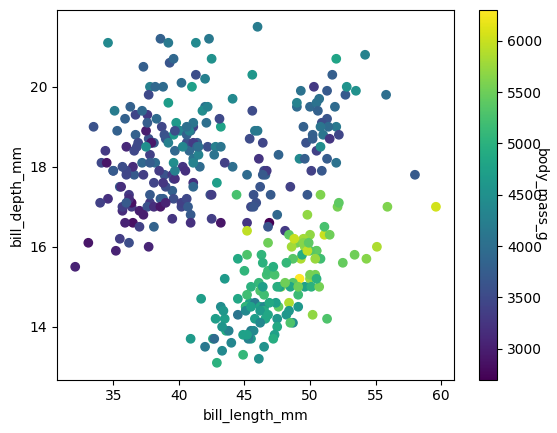

In [25]:
x_feat = 'bill_length_mm'
y_feat = 'bill_depth_mm'
color_feat = 'body_mass_g'

plt.scatter(df[x_feat], df[y_feat], c=df[color_feat])
plt.xlabel(x_feat)
plt.ylabel(y_feat)
cbar = plt.colorbar()
cbar.set_label(color_feat, rotation=270)


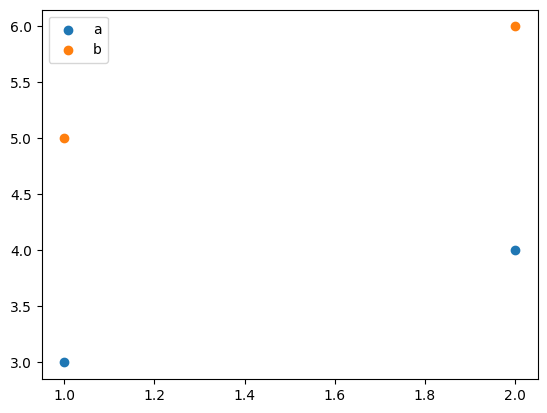

In [16]:
plt.scatter([1, 2], [3, 4], label='a')
plt.scatter([1, 2], [5, 6], label='b')
plt.legend()

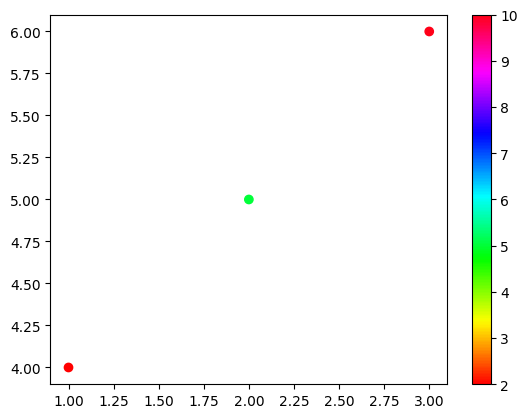

In [11]:
import matplotlib.pyplot as plt

plt.scatter([1, 2, 3], [4, 5, 6], c=[2, 5, 10], cmap='hsv')
plt.colorbar();

# One motivation for Object Oriented Programming (OOP):

Do you know everything a car does when you step on one of these? ... me neither, but I can still use a car.
<img src="https://www.statefarm.com/content/dam/sf-library/en-us/secure/legacy/simple-insights/quick-steps-to-take-if-your-gas-pedal-sticks.jpg">

- Users need only understand some interface to use an object
- Users need not how tasks are accomplished

Examples:
- cars: we regularly drive cars without understanding all their behaviors:
    - driving faster than 10 mph -> lock doors
    - when wheel turning left -> turn off right blinker (after turn)
    - collision detected -> airbag
    - slipping applied -> relax force on brakes (ABS)
- software: `pd.DataFrame.groupby()`
    - we know what this function does
    - we know what inputs the function requires and what outputs it gives
    - we don't know precisely how this function is built ... 
        - ... didn't stop us from using it though!


# Implementation vs Interface: 
Let's define (and distinguish) the following in our software
- interface
    - the inputs, outputs and expected behavior of a function
- implementation
     - the particular operations applied to accomplish some task
        
For example, from Lab 2's tic-tac-toe project:

### Interface
```python
def get_apply_input(board, player_idx, board_null=0):
    """ gets input from user and applies their mark
    
    re-query if input given does not refer to a 
    position on the board currently marked as board_null
    
    Args:
        board (np.array): a 3x3 tic-tac-toe board
        player_idx (int): player whose turn is being taken
            (either 1 or 2)
        board_null (int): the value of open positions
            on the board
            
    Returns:
        board (np.array): a 3x3 tic-tac-toe board
            which has recorded 
    """
    assert player_idx in (1, 2), 'invalid player_idx'
```

### Implementation
``` python
    # get input from user
    while True:
        row_idx, col_idx = get_position(player_idx)
        if board[row_idx, col_idx] == board_null:
            break
        print('invalid input given')
        
    # mark board and return
    board[row_idx, col_idx] = player_idx
    
    return board   
```


## OOP software ...
- hides (often irrelevant) implementation details
- only requires a user understand its interface

## This can profoundly simplify our software `:)!`

Why is simple software good?
- bugs hide in complexity ... they're easily found in a simple program
- easier to maintain / upgrade
- easier to share software among different programmers
- quicker construction of complex projects
- that satisfying feeling of boiling an idea down to its essense...

###### Quick Definition Aside: Modularity / Modular Programming
Breaking a big task into distinct "modules", which are only aware of each others interface is **modular programming** ... the first statement above can be summarized as "OOP allows for modular programming"


### How does OOP hide the implementation?

### Procedural Programming

A style of programming where information is processed in a step-by-step recipe.

```python
# find the smallest element in some tuple, replace it with 123
some_tuple = (1, 2, 3, 4)
smallest_idx = 0
for idx in range(1, len(some_tuple)):
    if some_tuple[idx] < some_tuple[smallest_idx]:
        # new smallest item is found
        smallest_idx = idx
some_tuple[smallest_idx] = 123
```

### Object Oriented Programming

```python
# find the smallest element in some tuple-like object, replace it with 123
some_tuple_obj = TupleLikeObject((1, 2, 3, 4))
some_tuple_obj.replace_smallest(123)
```

where:

`replace_smallest()` is a particular function we've associated with our data

### OOP achieves this simplification by "hiding" the implementation of `replace_smallest()` in a class definition which defines the behavior of a `TupleLikeObject`


### Sorry for lying to you ...
Today I'll talk about Procedural and OOP as if they're completely distinct ... this is a helpful lie as we get introduced to OOP.

In practice you'll find they're opposite ends of a spectrum and are entirely compatible styles.


# The classic OOP Example: a bank account

We'll go back over the anatomy of this example later to learn the syntax of OOP **implementation**, but for now I think you'll find its **interface** is so intuitive we can use this thing before studying its construction in detail.


In [26]:
class Account:
    """ a bank account
    
    Attributes:
        owner (str): owner of account
        balance (float): how much money is in it
        active (bool): true if account is open, false if account is closed.  
            deposit() and withdraw() only work on active accounts
    """
    
    def __init__(self, owner, balance=0, active=True):
        self.owner = owner
        self.balance = balance
        self.active = active
        
    def __repr__(self):
        return f'Account(owner={self.owner}, balance={self.balance}, active={self.active})'
        
    def deposit(self, value):
        """ add input value to account balance 
        
        Args:
            value (float): input value
        """
        assert self.active, 'account is inactive'
        self.balance = self.balance + value
        
    def withdraw(self, value):
        """ withdraw value from account balance
        
        Args:
            value (float): input value
        """
        assert self.active, 'account is inactive'
        
        self.balance = self.balance - value
        
    def deactivate(self):
        """ closes account, no more deposit / withdraws possible """
        self.active = False
        
    def activate(self):
        """ activates account, deposit / withdraws possible """
        self.active = True    


In [28]:
# make a new object: matt_checking with given attributes
matt_checking = Account(owner='matt', balance=3)
matt_checking


Account(owner=matt, balance=3, active=True)

In [29]:
# deposit 10 into object matt_checking
matt_checking.deposit(10)
matt_checking


Account(owner=matt, balance=13, active=True)

In [30]:
# withdraw 4 from object matt_checking
matt_checking.withdraw(4)
matt_checking


Account(owner=matt, balance=9, active=True)

In [31]:
# deactivate matt_checking 
# (notice: comment is redundant with code below ... what beautiful variable / function names!)
matt_checking.deactivate()
matt_checking


Account(owner=matt, balance=9, active=False)

In [32]:
# you can't make deposits if the account isn't active!
matt_checking.deposit(1)


AssertionError: account is inactive

In [33]:
# you can access an object's attributes directly if you'd like
matt_checking.balance


9

In [34]:
# you can modify an object's attributes directly 
# (but you shouldn't ... allow me to explain later)
matt_checking.balance = 12348
matt_checking


Account(owner=matt, balance=12348, active=False)

# In Class Activity A

- Build a new bank account with your own name and a starting balance of your choosing
- Build another bank account with another name and balance
    - any choice is fine
- deposit 100 into your account
- deactivate (and then reactivate) your account
- withdraw half the balance of your account
    - (++) can you do this programmatically ... having the computer compute half the balance of the account?


In [35]:
eli_account = Account(owner='eli', balance=123)
eli_account


Account(owner=eli, balance=123, active=True)

In [36]:
sal_account = Account(owner='sal', balance=456)
sal_account

Account(owner=sal, balance=456, active=True)

In [37]:
eli_account.deposit(100)
eli_account

Account(owner=eli, balance=223, active=True)

In [43]:
sal_account

Account(owner=sal, balance=456, active=True)

In [38]:
eli_account.deactivate()
eli_account.activate()

In [41]:
eli_account

Account(owner=eli, balance=223, active=True)

In [42]:
eli_account.withdraw(eli_account.balance / 2)
eli_account

Account(owner=eli, balance=111.5, active=True)

# Procedural vs Object Oriented Programming 

### Procedural
In procedural programming, one seperates:
- **data** - the information that our programs process (nouns)
- **functions** - the machines which accept some input data and give new output data (verbs)


# An object is the fusion of data & the functions which use this data

### Object Oriented Programming
In OOP, we construct "objects", which contain both data and functions which operate with this data.

- **attributes** - special name for data contained within an object
    - e.g. the `matt_checking` object above contains attributes:
        - `owner`
        - `balance`
        - `active`
    - The **state** of an object is the set of all its attribute.
- **methods** - special name for a function associated with object's data (attributes)
    - e.g. any `Account` object contains methods:
        - `Account.deposit()`
        - `Account.withdraw()`
        - `Account.activate()`
        - `Account.deactivate()`
        
**attributes** are the things an object has while **methods** are the things an object can do
        


### Procedural Functions vs OOP Methods:

```python
# typical procedural programming
some_new_data = function(some_input_data)
```
notice: the function returns some new data

```python
# typical oop programming
matt_checking.deposit(100)
```
- the method doesn't need to return any data, it has modified the `matt_checking` object's attribute `balance`.
- though this method doesn't return anything, other methods can (see `__repr__()` above)


# Whats a Class, how is different than an object?

A **Class** is a template which defines the behavior of all the objects of that type.
- `Account` is a class

An **Object** is a particular instance of a class.  (Mutiple objects may belong to a single class)
- `matt_checking` is an instance of class `Account`


In [44]:
matt_checking = Account(owner='matt', balance=123)
type(matt_checking)


__main__.Account

In [45]:
# notice: we can make another object for a completely different account
# (and calling its methods doesn't impact other accounts)
zeke_brokerage = Account(owner='zeke', balance=39875987)
zeke_brokerage


Account(owner=zeke, balance=39875987, active=True)

In [46]:
matt_checking.deposit(100)



In [47]:
matt_checking

Account(owner=matt, balance=223, active=True)

In [48]:
zeke_brokerage

Account(owner=zeke, balance=39875987, active=True)

# Class and Type refer to the same thing
`type()` is a function which returns the type / class of a particular object


In [49]:
type(matt_checking)


__main__.Account

### Many of our old friend data types are objects ...

`str`, `dict`, `list`, `tuple`, `int`, `float`

honestly ... most things in python are objects.


In [50]:
# build a new object `some_list` whose class is `list`
some_list = list([1, 2, 3])
type(some_list)


list

In [15]:
# notice: no return value, but modifies the internal state of some_list ... feels like OOP
some_list.append(100)
some_list


[1, 2, 3, 100]

# Thats a lot of new stuff ... lets review some core ideas:

- objects contain both:
    - data (called attributes) 
    - functions (called methods)

- A class (e.g. `Account`) is a template which defines the behavior of all individual object instances (e.g. `matt_checking`)

- The class definition (that big block of code we didn't study before beggining with `class Account`)
    - defines what attributes an object has
    - defines what methods an object has


# Today's big skill: Anatomy of a Class Definition

Exactly how does all that syntax define the behavior of `Account` objects?


## A class definition statement

```python
class Account:
```

tells python we're defining a new class.  By [convention](https://course.ccs.neu.edu/ds2500/python_style.html#class-docstrings) classes use camelcase:
- e.g. CapitalizeFirstLetterOfEachNewWord
    - and don't use underscores
    
##### Note: 
the following slides take apart the remaining pieces of the `Account` class definition:
- all should be indented underneath this `class Account:` statement.


## A class docstring

```python
    """ a bank account
    
    Attributes:
        owner (str): owner of account
        balance (float): how much money is in it
        active (bool): true if account is open,
            false if account is closed.  closed
            accounts much have zero balance.
    """
```
- a brief statement summarizing object
- (optional) as many sentences as you want to include to describe object.  
    - each method will document its own behavior, no need to do that here
- a list of attributes and their descriptions
    - since all methods may access attributes, we include their description right here at the top 
        - no need to repeat this throughout the class definition
    


## Class Methods

Methods are functions which belong to a class.  Their syntax reflects this, just write functions indented under the proper class definition:

```python
    def deposit(self, value):
        """ add input value to account balance 
        
        Args:
            value (float): input value
        """
        assert self.active, 'account is inactive'
        self.balance = self.balance + value
        
    def withdraw(self, value):
        """ withdraw value from account balance
        
        Args:
            value (float): input value
        """
        assert self.active, 'account is inactive'
        
        self.balance = self.balance - value
        
    def deactivate(self):
        """ closes account, no more deposit / withdraws possible """
        self.active = False
        
    def activate(self):
        """ activates account, deposit / withdraws possible """
        self.active = True    
```

### What is `self`?
Remember, all objects have a set of internal attributes (owner, balance, active).  The methods of an object operate on these internal attirbutes.  

**To access these internal attributes the first input of all methods is `self`, attributes are accessed as `self.owner` or similar**

notes: 
- because self is input to all methods ... no need to document it
- self is always the first input to all methods 
    - python syntax rule
- you could rename the variable "self" to some variable name within a method ...
    - ... but don't
    - python community convention

### Common student error:
We must first build a particular instance (object) of some class before we can use its methods.  


In [ ]:
class Account:
    """ docstring"""
    def some_method(self, x):
        return 8

## A constructor

```python
    def __init__(self, owner, balance=0, active=True):
        self.owner = owner
        self.balance = balance
        self.active = active
```

A **constructor** is the special method which builds new objects of the class (every class has a constructor).
- to call the constructor a class, use the same of the class, not `__init__()`
- most constructors are just storing data as a particular object's attributes (as above)
    - for variables you're just storing, no need to document in constructor ... already given in class docstring


In [16]:
# build a new account with given data
matt_account = Account(owner='matt', balance=10)


## `__repr__()`
    
```python
    def __repr__(self):
        return f'Account(owner={self.owner}, balance={self.balance}, active={self.active})'
```

returns a string representation of the object, used when we `print(object)`
- By convention we use a format like the constructor interface, but any string returned is proper python syntax.   
- some objects have so many attributes its not worth writing them all out ...
    - e.g. consider an object with a large array attribute


In [58]:
class ASillyClass:
    # a class with no attributes and a silly string representation
    def __init__(self, x):
        # every class needs a constructor
        print('hi, the constructor is running now!')
        self.x = x
    def __repr__(self):
        return f'ASillyClass(x={self.x})'

In [59]:
some_object = ASillyClass(x=100)

hi, the constructor is running now!


In [60]:
some_object

ASillyClass(x=100)

In [62]:
matt_checking.__dict__

{'owner': 'matt', 'balance': 223, 'active': True}

# In Class Activity B:
By copy-pasting and modifying the `Account` class above, create a new class `AccountTaxable` which has the following upgrades:
- includes a new attribute `kind` which stores a string 
    - e.g. 'checking', 'savings', 'brokerage', 'creepy-secret-offshore-unethical-kind-of-thing'
        - you needn't ensure the input is one of these particular strings
- the method `AccountTaxable.withdraw()` now checks to ensure there is a sufficient balance in the account before operating.  If requested withdraw amount is greater than the balance, throw an error (i.e. `assert`)
- add a new method `AccountTaxable.tax()` which accepts a single variable `rate` which is a float betweeen 0 and 1.  
    - The `taxed_amount` is computed as `AccountTaxable.balance * rate`.  
    - Reduce the balance by `taxed_amount`
    - return `taxed_amount` 
        - so the user of our object can see how much tax was assessed
    - throw an error if account type is 'creepy-secret-offshore-unethical-kind-of-thing'
        - how silly of our user ... we couldn't tax these kinds of accounts!
        
While modifying the Class `AccountTaxable`, create a few objects (i.e. `bob_checking = AccountTaxable(...)`) and call the methods modified to ensure that the behavior you're after is implemented correctly.     


In [87]:
some_acct = AccountTaxable(owner='matt', kind='checking', balance=100)

In [73]:
some_acct.withdraw(10)

In [88]:
some_acct.tax(.05)

5.0

In [89]:
some_acct

AccountTaxable(owner=matt, balance=95.0, active=True, kind=checking)

In [90]:
some_acct.kind = 'creepy-secret-offshore-unethical-kind-of-thing'
some_acct

AccountTaxable(owner=matt, balance=95.0, active=True, kind=creepy-secret-offshore-unethical-kind-of-thing)

In [91]:
some_acct.tax(.05)

AssertionError: we dont tax these!

In [86]:
class AccountTaxable:
    """ a bank account
    
    Attributes:
        owner (str): owner of account
        balance (float): how much money is in it
        active (bool): true if account is open, false if account is closed.  
            deposit() and withdraw() only work on active accounts
        kind (str): kind of account (e.g. 'checking')
    """
    
    def __init__(self, owner, kind, balance=0, active=True):
        self.owner = owner
        self.balance = balance
        self.active = active
        self.kind = kind
        
    def __repr__(self):
        return f'AccountTaxable(owner={self.owner}, balance={self.balance}, active={self.active}, kind={self.kind})'
    
    def tax(self, rate):
        """ computes amount taxed, and taxes the account
        
        Args:
            rate (float): tax rate (e.g. .05)
            
        Returns:
            taxed_amount (float): amount of tax paid
        """
        assert 0 <= rate <= 1, 'invalid rate'
        assert self.kind != 'creepy-secret-offshore-unethical-kind-of-thing', 'we dont tax these!'
        
        # compute & apply tax
        taxed_amount = rate * self.balance        
        self.balance = self.balance - taxed_amount
        
        return taxed_amount
    
    def deposit(self, value):
        """ add input value to account balance 
        
        Args:
            value (float): input value
        """
        assert self.active, 'account is inactive'
        self.balance = self.balance + value
        
    def withdraw(self, value):
        """ withdraw value from account balance
        
        Args:
            value (float): input value
        """
        assert self.active, 'account is inactive'
        
        assert self.balance >= value, 'insufficient funds!'
        
        self.balance = self.balance - value
        
    def deactivate(self):
        """ closes account, no more deposit / withdraws possible """
        self.active = False
        
    def activate(self):
        """ activates account, deposit / withdraws possible """
        self.active = True    



In [ ]:
# note to self: show "stale object" error (object created from old class definition)


# `is` vs `==`

- `==` tests if two objects are equal
- `is` tests if two seperate variable names refer to the very same object


In [92]:
# these are two seperate lists
list0 = [1, 2, 3]
list1 = [1, 2, 3]


In [93]:
# the values of the lists are equivilent
list0 == list1


True

In [94]:
# but these are two seperate objects
list0 is list1


False

In [95]:
# this is one list, with two variable names
list_a = [1, 2, 3]
list_b = list_a


In [96]:
# the values of the lists are equivilent
list_a == list_b


True

In [97]:
# they refer to the same object
list_a is list_b


True

# funky behavior / bug alert

When we have two variable names which refer to the same object, modifying "one" will modify the "other".

(We use quotes to emphasize that there is really only one object with two names, you can access it with either name)


In [98]:
list_a.append('a new item on the end')


In [99]:
list_b


[1, 2, 3, 'a new item on the end']

# A common (and subtle) bug: mutable default values

This bug shows up for default values which are mutable (changable): list, array, dictionary

Note that you're safe with default values which aren't mutable: int, float, tuple, string


In [100]:
def some_fnc(input_list=list()):
    """ appends a few values to an list and returns it"""
    
    input_list.append(123)
    input_list.append('hey!')
    
    return input_list


In [101]:
# if we pass a list into this function, it works as expected
some_fnc([1, 2, 3])


[1, 2, 3, 123, 'hey!']

In [102]:
# if we don't pass a list, it appears to work (the first time)
x = some_fnc()
x


[123, 'hey!']

In [103]:
# but what happened the second time?
y = some_fnc()
y


[123, 'hey!', 123, 'hey!']

In [104]:
z = some_fnc()
z

[123, 'hey!', 123, 'hey!', 123, 'hey!']

In [105]:
x is y

True

In [106]:
y is z

True

In [33]:
# and how come that function call immediately above modified x?
x


[123, 'hey!', 123, 'hey!']

In [34]:
# because x and y are the same ...
x is y


True

There is one (and only one) default input list ... even if we assign it multiple variable names (see `list_a` / `list_b` example above).  Whenever we modify this default list it changes the default in all future runs!

### Convention to avoid this trouble:
If your default value is mutable (an object whose attributes can be changed), don't set it in the function header statement like this:

```python
def some_fnc(input_list=list()):
```

instead, let us use a 1 as a "placeholder" value

```python
def some_fnc(input_list=1):
```

if input_list equals this 1, then we'll build a fresh copy of the default empty list with every call to the function:


In [107]:
def some_fnc_improved(input_list=1):
    """ appends a few values to an list and returns it
    """
    
    if input_list == 1:
        # we built a new list for default value with every function run
        input_list = list()
        
    input_list.append(123)
    input_list.append('hey!')
    
    return input_list


In [108]:
# works if you pass a list
some_fnc_improved([1, 2, 3])


[1, 2, 3, 123, 'hey!']

In [109]:
# works first time
x = some_fnc_improved()


In [110]:
# works a second time (an improvement!)
y = some_fnc_improved()
y


[123, 'hey!']

In [111]:
# a different default value is made with each run: problem solved!
x is y


False

# Problem!

Is it safe to use 1 as a placeholder like this in all cases?  

What if 1 is a valid input to the function ... how will we distinguish between the placeholder 1 and the valid input 1?

... using the value 1 as a placeholder isn't such a good idea.


# `None`

`None` is a special python object.  Its used as a placeholder to indicate the absence of data.

(None is similar in spirit to `np.nan`, though nan is used to represent the absence of a number, `None` is used to represent the absence of any input)


In [112]:
# printing None shows 'None'
print(None)


None


In [113]:
# jupyter parroting None doesn't show anything though
None


In [114]:
# we see None show up when we set a variable equal to a function which doesn't return anything
def some_fnc_no_return():
    print('this function didnt return anything')
    
x = some_fnc_no_return()


this function didnt return anything


In [115]:
x == None


True

# Using `None` as a placeholder for the default value:

(don't use values which might ever be legitimate inputs as placeholders, we just used 1 earlier for exposition)


In [44]:
def some_fnc_improved(input_list=None):
    """ appends a few values to an list and returns it
    """
    
    if input_list == None:
        # we built a new list for default value with every function run
        input_list = list()
        
    input_list.append(123)
    input_list.append('hey!')
    
    return input_list


# In Class Activity C (if time)

Build an `AccountSimple` class which is a bank account class having attributes:
- owner (str)
- balance (float)
- heir_list (list of strings)
    - default to empty list
        - feels like a potential bug we've seen recently ...
        
Your `AccountSimple` should have methods:
- `AccountSimple.__init__()`
- (++)`AccountSimple.give_to_heirs()`
    - the accounts balance is evenly distributed to all heirs
        - account balance should be 0 after running this method
    - returns a list of `AccountSimple` objects for each heir
        - heir accounts created with proper owner & balance
            - each heir account should be built with default `heir_list`


In [116]:
class AccountSimple:
    """ a simple bank account
    
    Attributes:
        owner (str): owner of account
        balance (float): how much money is in account
        heir_list (list): a list of strings, each is an heir to account
    """
    
    def __init__(self, owner, balance, heir_list=None):
        if heir_list is None:
            # default heir list
            heir_list = list()
            
        self.owner = owner
        self.balance = balance
        self.heir_list = heir_list
        
    def __repr__(self):
        return f'AccountSimple(owner={self.owner}, balance={self.balance}, heir_list={self.heir_list})'
        
    def give_to_heirs(self):
        num_heir = len(self.heir_list)
        assert num_heir > 0, 'no heirs to give account balance to'
        
        # compute balance of each heir account, drain balance of self
        heir_balance = self.balance / num_heir
        self.balance = 0
        
        # build heir account for every heir, collect in list
        heir_acct_list = list()
        for heir in self.heir_list:
            heir_acct = AccountSimple(owner=heir,
                                      balance=heir_balance)
            heir_acct_list.append(heir_acct)
        
        return heir_acct_list      
        


In [117]:
account_a = AccountSimple(owner='a', balance=0, heir_list=['a0', 'a1'])
account_b = AccountSimple(owner='b', balance=100, heir_list=list())
account_c = AccountSimple(owner='c', balance=100)


In [118]:
# test AccountSimple.give_to_heirs()
account_a = AccountSimple(owner='orig-owner', balance=60, heir_list=['a', 'b', 'c'])


In [119]:
account_a


AccountSimple(owner=orig-owner, balance=60, heir_list=['a', 'b', 'c'])

In [120]:
heir_acct_list = account_a.give_to_heirs()
heir_acct_list


[AccountSimple(owner=a, balance=20.0, heir_list=[]),
 AccountSimple(owner=b, balance=20.0, heir_list=[]),
 AccountSimple(owner=c, balance=20.0, heir_list=[])]

In [121]:
account_a

AccountSimple(owner=orig-owner, balance=0, heir_list=['a', 'b', 'c'])